# **AISaturdays Ocean Proximity Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial del curso de Deep Learning.

En este ejercicio trataremos de predecir la proximidad del océano con respecto a un conjunto de viviendas.

**Enlaces:**
- AISaturdays Deep Learning [temario clase 1](https://app.eduflow.com/courses/d4d36f90-f65e-4ede-b8f3-16f498ce3a33/flows/98016aaa-4e29-428f-a8f9-d5d9477d7274/activities/d9f00e62-0403-4a21-bdae-c6a3ea2984e5).
- Ejercicio Kaggle: https://www.kaggle.com/camnugent/california-housing-prices

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: *Pandas, MatPlotLib, Numpy, Scikit-learn, Keras,TensorFlow*.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Modelo de redes neuronales*" para procesar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción y evitar overfitting.


¡Empecemos!

#1. Importación de librerías


In [30]:
!pip install keras

*Importaremos* las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), pulsa el play de la izquierda o **Ctrl + Enter**.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # Corrected import
import tensorflow as tf
import seaborn as sns

#2. Dataset
![texto alternativo](https://i.imgur.com/TMvhIbd.png)

### Obtener el dataset y previsualizar la información del dataset.

¡Nuestra tabla! Para poder visualizar y limpiar los datos convertiremos el archivo CSV.

Los datos se almacenarán en un dataframe llamado **df**.

In [32]:
# Sólo con una línea de código
df = pd.read_csv('housing.csv')

1. Tu turno. Muestra los primeros valores del archivo CSV para hacernos una idea del contenido de la tabla con el código: df.head()


---

In [33]:
# Sólo con una línea de código
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Variables

* **longitude:** Valor longitude de la coordenada.
* **latitude:** Valor latitude de la coordenada.
* **housing_median_age:** Edad media de las viviendas de esta zona.
* **total_rooms:** Total de habitaciones.
* **total_bedrooms:** Total de camas.
* **population:** Población en esta zona. Importante denotar que también es un valor total.
* **households:** Viviendas en esta zona. Importante denotar que también es un valor total.
* **median_income:** Salario medio de las personas de esta zona.
* **median_house_value:** Valor medio de la vivienda de esta zona.
* **ocean_proximity:**  ¡El resultado! Significa la proximidad del océano con respecto a las viviendas de esta zona. Si nos fijamos, este campo contiene valores de cadena (etiquetas) para determinar la proximidad.



### Analizar dataset:

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

2. Utiliza la función .describe() para analizar la distribución de los datos


---

In [34]:
# Sólo con una línea de código
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualicemos el contenido para hacernos una idea de la distribución de las viviendas por población y precio.

*   Es la zona de California, y al suroeste donde terminan los círculos, comieza el océano.
![California](https://california.azureedge.net/cdt/CAgovPortal/images/Uploads/menu-living.jpg)
*   El precio se indica con color rojo para las viviendas más caras.
*   Las viviendas más cercanas al océano se encuentran por lo tanto en la costa de California.




<Figure size 1000x700 with 0 Axes>

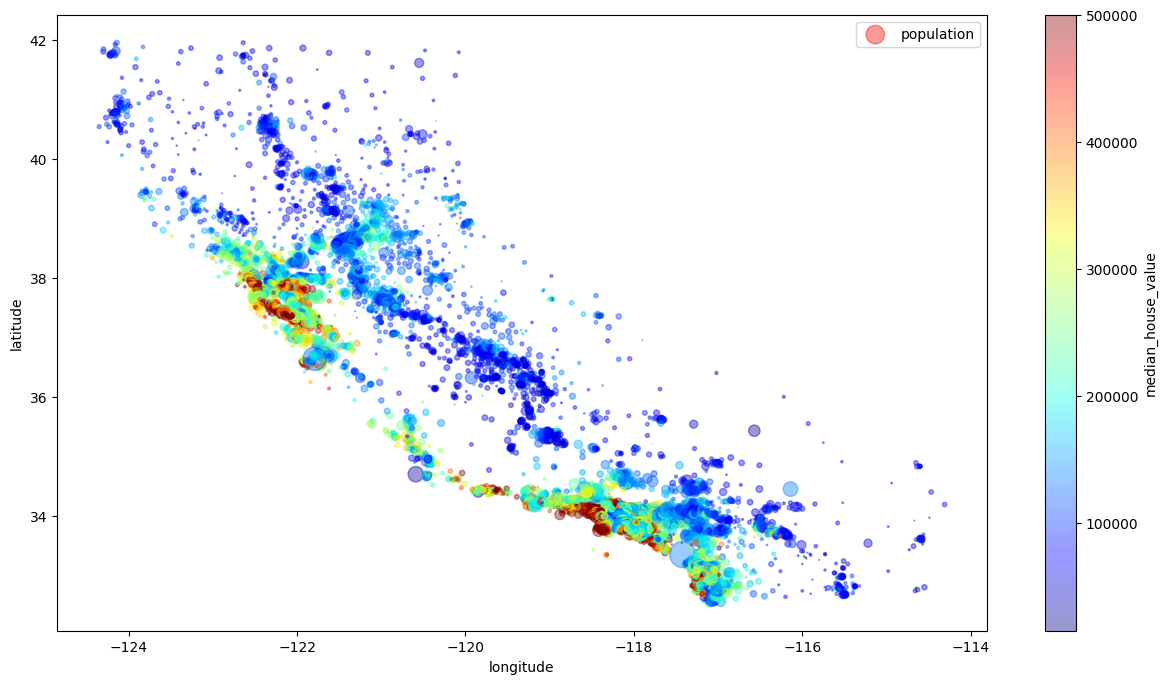

In [35]:
# Ejecutar el siguiente código
plt.figure(figsize=(10,7))
plotter = df.copy()
plotter.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=plotter["population"]/100, label="population", figsize=(15,8), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, )
plt.legend()

### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

En este apartado se pretende corregir y mejorar información en el dataset que pueda faltar, sea inconsistente o no sea correcta.

Este paso es necesario para mejorar cualquier predicción futura que se realice con el dataset.

Existen diferentes técnicas para corregir y mejorar la calidad e integridad de información de nuestro dataset.

Como futura lectura, recomendamos el siguiente enlace con [técnicas de mejora del dato](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data).



3. Muestra el sumatorio de los valores nulos del dataset: df.isnull()...
[Documentación](https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe)


---

In [36]:
# Sólo con una línea de código
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


4. Elimina las filas que tengan valores a 0: df.dropna(...) [Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---

In [37]:
# Sólo con una línea de código
df.replace(0, np.nan).dropna()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Analizar relaciones de la información del dataset

5. ¿Cual de estas variables está relacionada con la proxímidad del océano y cúal no? ¿Están relacionadas entre sí? **Explícalo a continuación**

---

A mayor cercanía de la costa, mayor valor.

Si hay mas demanda mientras mas cerca esta del oceano.


In [38]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


---

Crear una matriz de correlación visual. [Pista](https://datascienceplus.com/visualize-correlation-matrices-in-python/)

6. Crea una matriz de correlación visual usando .corr()


---

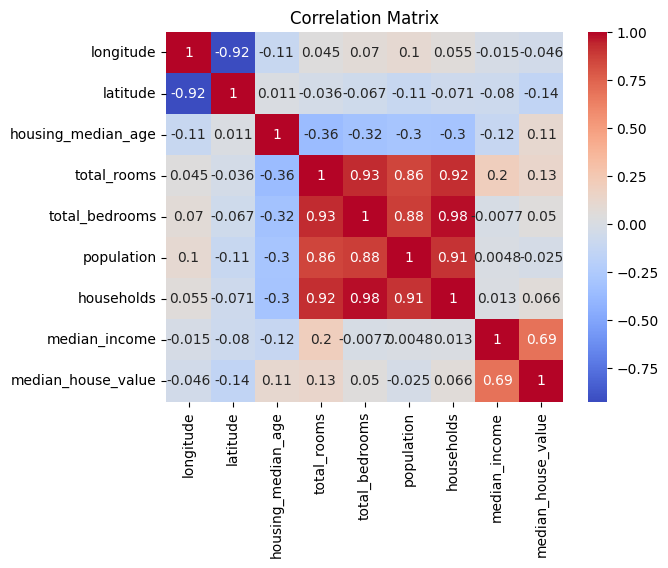

In [39]:
# Dos líneas de código
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

! Fíjate en todas posibles feature de la tabla de arriba que indican "**valores  totales**". (Pista: algunas de ellas no llevan el prefijo *total_* )

Estas features de totales nos indican los valores en una zona concreta de un grupo de viviendas. Para mejorar la predicción de nuestro modelo, nos conviene obtener los valores individuales por vivienda.

Los datasets no suelen ser perfectos, hay datos incompletos e incorrectos que reducen la eficiencia del modelo. Por ello necesitamos limpiarlo. [Pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf)

7. ¿Qué features están agrupadas por totales? ¿Con qué feature se agrupan y tienen más relación? (Pista: hay tres)

---

* total_rooms agrupada por households
corr(total_rooms, households) ≈ 0.9185

 * total_bedrooms agrupada por total_rooms
corr(total_bedrooms, total_rooms) ≈ 0.9304

* population agrupada por households
corr(population, households) ≈ 0.9072

8. De las feature agrupadas por totales, obtén las feature invididuales dividiéndolas por las que las agrupa, y añádelas al dataframe
---

In [40]:
# Tres líneas de código
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [41]:
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan).dropna()


9. Elimina del dataset las feature de totales agrupadas
---

In [42]:
# Sólo con una línea de código
df = df.drop(["total_rooms", "total_bedrooms", "population", "households"], axis=1)


Se eliminan las features de totales agrupadas porque ya fueron transformadas en ratios más representativos (rooms_per_household, bedrooms_per_room, population_per_household). Además, estas variables presentan alta correlación entre sí, lo que puede generar multicolinealidad y afectar el rendimiento del modelo.

10. Crea de nuevo una matriz de correlación visual usando .corr() para ver las nuevas feature añadidas y su correlación


---

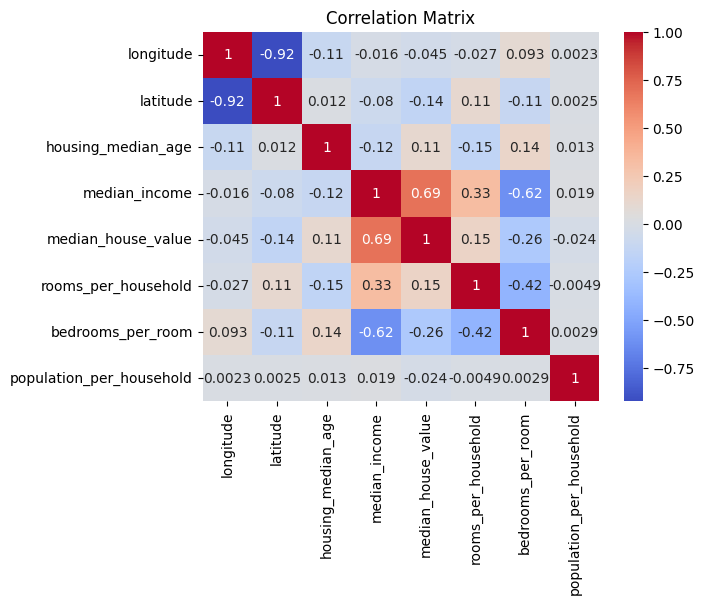

In [43]:
# Dos líneas de código
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


! Fíjate como ahora al haber procesado y quitado las feature de totales, hemos eliminado algunas correlaciones y la matriz nos muestra correlaciones más coherentes que nos ayudarán a mejorar la predicción de nuestro modelo.



Tras eliminar las features de totales agrupadas, se reducen las correlaciones artificialmente altas derivadas del tamaño bruto de los distritos. La nueva matriz muestra relaciones más coherentes. Se observa que median_income mantiene la mayor correlación positiva con `median_house_value` (0.69), siendo la variable más relevante para la predicción. Asimismo, `bedrooms_per_room` presenta una correlación negativa moderada (-0.26), mientras que `rooms_per_household` tiene una relación positiva más débil (0.15). En cambio, `population_per_household` apenas muestra relación lineal con la variable objetivo. Esta limpieza reduce la multicolinealidad y mejora la interpretabilidad del modelo.

13. Obtén los valores únicos de la feature de la que queremos obtener la predicción (ocean_proximity)


---

In [44]:
# Dos líneas de código
ocean_values = df['ocean_proximity']
ocean_values.unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

*14*. Explica qué ves en los valores anteriores.


---

La variable `ocean_proximity` contiene 5 clases distintas. Sin embargo, se observa un fuerte desbalance entre ellas, especialmente en la categoría ISLAND, que cuenta con un número muy reducido de registros en comparación con el resto. Este desbalance puede afectar negativamente al entrenamiento del modelo, ya que dificultará que aprenda correctamente esa clase. Por tanto, podría considerarse eliminarla o aplicar técnicas para manejar el desbalance.

Además, al tratarse de una variable categórica, será necesario codificarla antes de entrenar el modelo.

---

15. Mejora el dataframe con el análisis anterior


---

In [45]:
# Sólo con una línea de código
df = df[df['ocean_proximity'] != 'ISLAND']

### Normalizar las feature para nuestro modelo

![texto alternativo](https://i.imgur.com/o7YvGRe.png)


Ahora deberemos proceder a normalizar el resto de variables para que la escala de valores entre ellas sea similar y facilite el procesamiento a nuestro modelo y se logre mejorar la predicción (*Feature Scaling*).
Este paso es fundamental antes de entrenar nuestro modelo.

Puesto que la **función de activación** de nuestro modelo será '**softmax**', cuyos valores son de una escala entre -1 a 1, debemos normalizar las feature en este intervalo. [Pista](https://books.google.es/books?id=M5RRDwAAQBAJ&pg=PA137&lpg=PA137&dq=scaler.fit_transform+values.reshape&source=bl&ots=zzDuEQUdQR&sig=ACfU3U1NPGvTLq46zc-pJwcexE3wGKHQPw&hl=es&sa=X&ved=2ahUKEwi1qtPZ9MDnAhXdDWMBHc-MB0UQ6AEwDXoECAgQAQ#v=onepage&q=scaler.fit_transform%20values.reshape&f=false)

16. Normaliza las feature a la escala de softmax y añádelas al dataframe.


---

In [46]:
# Seis líneas de código (cómo mínimo)
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
num_cols = df.drop('ocean_proximity', axis=1).columns
scaled_values = scaler.fit_transform(df[num_cols])
df_scaled = df.copy()
df_scaled[num_cols] = scaled_values
df = df_scaled


17. Utiliza la función .describe() para analizar la distribución de los datos


---

In [47]:
# Sólo con una línea de código
df_scaled.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,0.475997,0.328776,0.541759,0.232517,0.395510,0.032504,0.125582,0.001915
std,0.199575,0.227026,0.246866,0.130993,0.237963,0.017603,0.064423,0.008401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.142308,0.215414,0.025487,0.083806,0.001398
50%,0.582669,0.182784,0.549020,0.209487,0.339588,0.031083,0.114608,0.001710
75%,0.631474,0.550478,0.705882,0.292698,0.514845,0.036907,0.155281,0.002084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Modelo redes neuronales

El modelo de [redes neuronales](https://pathmind.com/wiki/neural-network) es una serie de algoritmos que logran reconocer patrones y correlaciones en un conjunto de datos a través de un proceso que simula el funcionamiento del cerebro con la finalidad de determinar predicciones que puedan interesarnos.

En Deep Learning uno de los usos más frecuentes del modelo de redes neuronales es el caso de análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).



**Ejemplo genérico de Red Neuronal**

![texto alternativo](https://pathmind.com/images/wiki/perceptron_node.png)

**Ejemplo de Red Neuronal Clasificador con función de activación SoftMax**

![Modelo](https://i.imgur.com/wcOwh5O.png)


**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.
- Detectar partes del cuerpo en imágenes o gestos.
- Detectar voces, transcripciones, textos..

**Objetivo**
- En este reto, queremos lograr **clasificar** aquellas viviendas según a la cercanía que estén del océano. Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un modelo de red neuronal con Keras:
  - Tipo de modelo: [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *Sequential*
  - Añadir 7 capas Dense.
  - La primera capa densa llevará seteada el número de features con las que se entrena el modelo, sin contar con la que queremos averiguar.
  - Las seis primeras capas llevarán la función de activación 'relu'.
  - La última capa llevará la función de activación 'softmax'.
- Compilar el modelo con:
  - Los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
  - Función de activación: 'softmax'. [Pista](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=es-419)
  - Función de pérdida: 'categorical_crossentropy'. [Pista](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
  - Función de optimización: 'adam'. [Pista](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Entrenar el modelo con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento y los datos de validación.
- Determinar las conclusiones de los resultados obtenidos en el modelo.

Creación del modelo de redes neuronales

18. Crea el set de datos de entrenamiento y validación necesarios para nuestro modelo

---

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
# Sólo una línea de código
X = df.drop(['ocean_proximity', 'median_house_value'], axis=1)

# Crea y , con un LabelEncoder para pasar a enteros los valores que tiene la feature que queremos averiguar
# Dos lineas de código
le = LabelEncoder()
y = le.fit_transform(df['ocean_proximity'])
# Crea el set de datos de entrenamiento y validación.
# Sólo una línea de código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Convierte y_train y y_test al formato que se necesita par entrenar nuestro modelo con: np_utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape)
print(y_train.shape)


(16342, 7)
(16342, 4)


19. Crea y compila el modelo como se indican en los pasos de implementación descritos anteriormente

---

In [65]:
# Importar librerías keras
import keras.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

# Crear el modelo secuencial
# Sólo una línea de código
model = Sequential()
# Añadir 7 capas Dense con sus propiedades como se indica en la implementación
# Siete líneas de código
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo como se indica en la implementacióbn
# Sólo una línea de código
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20. Explica los siguientes conceptos
---
- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'

> Porque la red tiene una estructura lineal, donde las capas se añaden una detrás de otra. No se requiere una arquitectura compleja con múltiples entradas o salidas.
- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar?
> `input_dim` debe ser igual al número de features de entrada (8 en este caso).  
No se debe incluir `ocean_proximity`, ya que es la variable objetivo.
- ¿Qué función de activación se ha seteado en la última capa?
> Se ha utilizado `softmax`.
- ¿Por qué se ha elegido esa función de activación en la última capa?
> Porque es un problema de clasificación multiclase. `Softmax` convierte las salidas en probabilidades que suman 1.

- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida?
> Porque estamos trabajando con clasificación multiclase y las etiquetas están en formato one-hot.
- ¿Qué significa la terminología de función de optimización?
> Es el algoritmo que ajusta los pesos del modelo para minimizar la función de pérdida. En este caso se usa `adam` por su eficiencia y estabilidad.

In [66]:
# Visualizar el resultado de la compilación del modelo
# Sólo una línea de código
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,676 (33.89 KB)

 Trainable params: 8,676 (33.89 KB)

 Non-trainable params: 0 (0.00 B)

21. Entrena finalmente el modelo con los parámetros necesarios: X_train, Y_train, epochs=???, batch_size=???, validation_data=(X_test,Y_test)
---
- El set de entrenamiento Y_train debe esta previamente convertido al formato que necesita el modelo. No se debe usar directamente el obtenido de train_test_split(...)
- Prueba con diferentes epochs (iteraciones): 10, 100, 500, 1000.
- Prueba con diferentes batch_size: 10, 200, 1000, 100000.

---

In [67]:
#Usa este EarlyStopping para conseguir un mejor modelo
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, restore_best_weights=True,patience=10)
# Sólo con una línea de código. Recuerda guardar el historial de entrenamiento para los siguientes pasos.
history = model.fit(X_train, y_train, epochs=1000, batch_size=200, validation_data=(X_test, y_test), callbacks=[es], verbose=2)

Epoch 1/1000
82/82 - 5s - 58ms/step - accuracy: 0.5746 - loss: 1.2159 - val_accuracy: 0.6297 - val_loss: 0.9811
Epoch 2/1000
82/82 - 0s - 4ms/step - accuracy: 0.7096 - loss: 0.8070 - val_accuracy: 0.7286 - val_loss: 0.7260
Epoch 3/1000
82/82 - 0s - 4ms/step - accuracy: 0.7587 - loss: 0.6434 - val_accuracy: 0.7704 - val_loss: 0.5957
Epoch 4/1000
82/82 - 0s - 4ms/step - accuracy: 0.7682 - loss: 0.5781 - val_accuracy: 0.7638 - val_loss: 0.5527
Epoch 5/1000
82/82 - 0s - 4ms/step - accuracy: 0.7888 - loss: 0.5199 - val_accuracy: 0.7956 - val_loss: 0.4869
Epoch 6/1000
82/82 - 0s - 4ms/step - accuracy: 0.8154 - loss: 0.4582 - val_accuracy: 0.8216 - val_loss: 0.4301
Epoch 7/1000
82/82 - 0s - 4ms/step - accuracy: 0.8241 - loss: 0.4243 - val_accuracy: 0.8350 - val_loss: 0.3963
Epoch 8/1000
82/82 - 0s - 5ms/step - accuracy: 0.8340 - loss: 0.3866 - val_accuracy: 0.8120 - val_loss: 0.4788
Epoch 9/1000
82/82 - 0s - 5ms/step - accuracy: 0.8413 - loss: 0.3711 - val_accuracy: 0.8546 - val_loss: 0.3585


In [68]:
import numpy as np

print("NaN en X_train:", np.isnan(X_train).sum())
print("NaN en X_test:", np.isnan(X_test).sum())
print("Inf en X_train:", np.isinf(X_train).sum())
print("Inf en X_test:", np.isinf(X_test).sum())


NaN en X_train: longitude                   0
latitude                    0
housing_median_age          0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64
NaN en X_test: longitude                   0
latitude                    0
housing_median_age          0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64
Inf en X_train: longitude                   0
latitude                    0
housing_median_age          0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64
Inf en X_test: longitude                   0
latitude                    0
housing_median_age          0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64


In [69]:
# Evalua el modelo con los datos de X_test y Y_test
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss en test:", loss)
print("Accuracy en test:", accuracy)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9242 - loss: 0.1679
Loss en test: 0.17081370949745178
Accuracy en test: 0.9238864183425903


In [72]:
# Comprobación de overfitting en el último epoch
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

0.9282829761505127
0.9287812113761902


22. Explica qué ocurre con diferentes epochs y batch_size
---
- ¿Qué ocurre con demasiados epochs? [Pista](#https://stats.stackexchange.com/questions/384593/why-too-many-epochs-will-cause-overfitting)
- ¿Qué ocurre con un valor demasiado grande de batch_size?


---

*Escribe aquí las respuestas:

Demasiadas epochs generan overfitting.
Batch sizes demasiado grandes son muy rápidas per epoch pero también generan overfiting.
Batch sizes demasiado pequeñas tardan demasiado.

Función auxiliar para ver la gráfica de la ejecución del modelo

In [78]:
# FUNCIÓN AUXILIAR, EJECUTAR, NO MODIFICAR.
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

23. Imprime las gráficas de entrenamiento del modelo
---


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

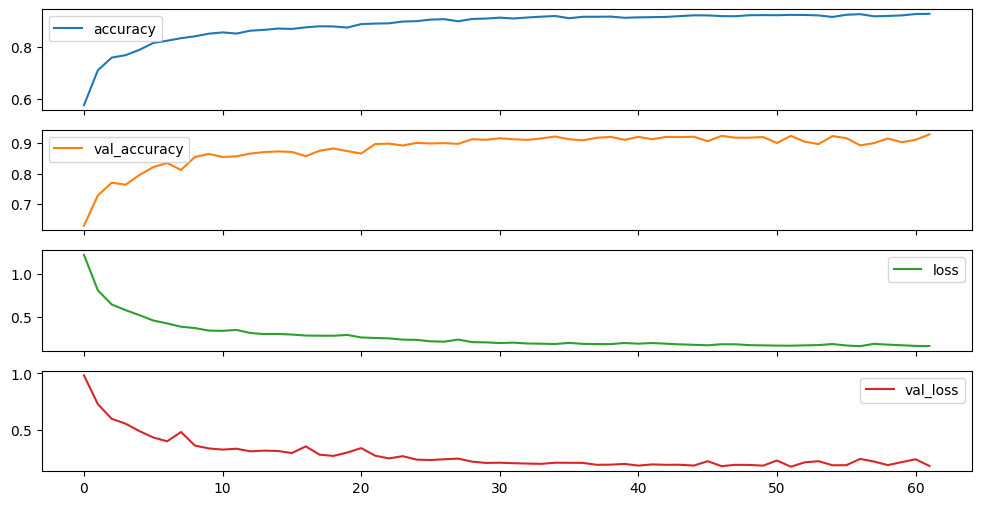

In [80]:
# Sólo con una línea de código
pd.DataFrame(history.history)[['accuracy','val_accuracy','loss','val_loss']].plot(subplots=True, figsize=(12,6))

24. Analiza y explica qué indica la gráfica del modelo
---
- Explica la gráfica de Accuracy
> La gráfica de accuracy muestra cómo mejora la precisión del modelo a lo largo de las épocas. Tanto la precisión de entrenamiento como la de validación aumentan progresivamente y se estabilizan alrededor del 92%. La cercanía entre ambas curvas indica que el modelo generaliza bien y no presenta sobreajuste.

- Explica la gráfica de Loss
> La gráfica de loss muestra cómo disminuye el error del modelo durante el entrenamiento. Tanto la pérdida de entrenamiento como la de validación descienden de forma constante hasta estabilizarse en valores bajos. Esto indica que el modelo aprende correctamente y converge de manera estable.


# 4. Mejorar la predicción

Mejorar la predicción y resultado de nuestro modelo es posible:

*   Aumentar el dataset o mejorar la calidad de los datos existentes.
*   **Optimizar hyperparámetros** de nuestro conjunto de datos y de nuestro modelo.

A continuación se pretende mejorar la predicción mediante la "*optimización de hyperparámetros*".

25. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del set de datos de entrenamiento y validación: random_state
---

In [83]:
# Escribe aquí el código
from sklearn.model_selection import train_test_split
from keras.layers import Input

for seed in [0, 7, 21, 42, 100]:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Recrear modelo
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100, batch_size=200, verbose=0)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    print(f"random_state={seed} → Accuracy={acc:.4f}")


random_state=0 → Accuracy=0.9202
random_state=7 → Accuracy=0.9202
random_state=21 → Accuracy=0.9413
random_state=42 → Accuracy=0.9298
random_state=100 → Accuracy=0.9334


*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.

### Mejora del modelo mediante modificación de `random_state`

Se probaron distintos valores del parámetro `random_state` en la división del dataset para analizar si la partición de los datos influía en el rendimiento del modelo.

Los resultados obtenidos mostraron pequeñas variaciones en la precisión, situándose entre aproximadamente 0.92 y 0.94. El mejor resultado se obtuvo con `random_state = 21`, alcanzando una accuracy cercana al 94%.

Estas diferencias se deben a que cada valor de `random_state` genera una partición distinta entre datos de entrenamiento y validación. Sin embargo, la variabilidad es reducida, lo que indica que el modelo es robusto y mantiene un alto rendimiento independientemente de la división específica de los datos.


26. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del modelo: Nº de parámetros de las capas Densas
---

In [84]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=200,
                    validation_data=(X_test, y_test),
                    callbacks=[es], verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", acc)


Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 47.
Accuracy: 0.9344101548194885


*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.

### Mejora del modelo mediante modificación del número de neuronas en las capas Dense

Se modificó el número de neuronas en las capas densas para aumentar la capacidad del modelo y evaluar si esto mejoraba su rendimiento.

Tras el entrenamiento con EarlyStopping, el modelo alcanzó una accuracy aproximada del 93.4% en el conjunto de test. El entrenamiento se detuvo de forma automática en la época 57, restaurando los pesos de la mejor época (47), lo que indica una convergencia estable y sin sobreajuste significativo.

La mejora respecto al modelo anterior fue ligera, lo que sugiere que la arquitectura original ya estaba bien dimensionada y que aumentar el número de parámetros solo aporta ganancias marginales en este problema.


----
## Conclusión Final del Proyecto

En este reto se desarrolló un modelo de red neuronal para clasificar viviendas según su proximidad al océano, abordando un problema de clasificación multiclase.

Durante el proceso se realizaron tareas clave de preprocesamiento, como la creación de variables derivadas, la eliminación de features redundantes, la limpieza de valores nulos y la normalización de datos. Estas etapas fueron fundamentales para garantizar la estabilidad del entrenamiento y evitar problemas como pérdidas NaN.

El modelo Sequential con capas Dense y activación ReLU, junto con una capa final Softmax y función de pérdida categorical_crossentropy, demostró ser adecuado para este tipo de problema. Tras el entrenamiento con EarlyStopping, el modelo alcanzó una precisión superior al 92% en el conjunto de validación, mostrando una excelente capacidad de generalización y ausencia de sobreajuste significativo.

Se realizaron pruebas adicionales modificando el `random_state` y el número de neuronas en las capas densas. Los resultados mostraron pequeñas variaciones en la precisión (entre 92% y 94%), confirmando la robustez del modelo. El aumento en el número de parámetros produjo mejoras marginales, lo que indica que la arquitectura original ya estaba correctamente dimensionada.

En conclusión, el modelo desarrollado es estable, robusto y eficaz para la clasificación propuesta, logrando un alto rendimiento mediante un correcto preprocesamiento y una arquitectura bien ajustada.
